# Datalab II <a name='jump'></a>

    Groepsnummer: 2B
    Coach: Marjolijn de Jager
    Namen groepsleden: 
        - Yara Passchier, 22080600
        - Jesse Van Leeuwen, 22096337
        - Alyssa Leliveld, 22111026
        - Bart Jeninga, 22079793
        - Nieyam Kanhai 22108920

# Table of contents

1. [Sprint 2](#sprint2)
    1. [Beschrijving tabellen](#beschrijftabellen)
        1. [Bepaling gevens van onze club](#gegevensclub)
        2. [Maken functie om gegevens te verzamelen](#functiebepaling)
            1. [Opstellen ranglijst van een seizoen](#ranglijst)
2. [Sprint 3](#sprint3)
    1. [Bepaal met behulp van SQL:](#SQL)
        1. [Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen.](#wedstrijdenperseizoen)
        2. [Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen.](#wedstrijden2010)
        3. [Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen.](#puntencompetitie)
        4. [Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst.](#teamranglijst)
    2. [Bepalen invloed teameigenschappen.](#teaminfluence)
        1. [Het mergen van het aantal punten per team en de teameigenschappen.](#dataframeteameigenschappen)
        2. [Bepalen correlatie teameigenschappen en behaalde punten.](#correlatie)
        3. [Visueel maken bevindingen.](#visualisatie)
3. [Sprint 4](#sprint4)
    1. [Numerieke gemiddelde spelers.](#gemiddeldspeler)
    2. [Toevoegen overall rating in dataframe match.](#overallrating)
    3. [Visualisatie overall rating speler van een seizoen.](#visueeloverallseizoen)
    4. [Visualisatie punten per wedstrijd per team.](#visueelpuntenwedstrijd)
    5. [Visualisatie vergelijking overall rating & punten per team.](#overallratingpuntenteam)
    6. [Toepassen functie op andere rating.](#definitieandererating)

# Sprint 2 <a name="sprint2"></a>

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import warnings
warnings.filterwarnings('ignore')
con = sqlite3.connect("database.sqlite")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

def show_query(query):
    """
       Deze functie print de output van je SQL query uit.
       Parameters:
                  query = Je SQL query.
                          Zorg ervoor dat deze parameter een string is.
    """
    query_output = pd.read_sql_query(query, con)
    return pd.DataFrame(query_output)


In [2]:
# Load the data into a DataFrame
df_country = show_query("SELECT * FROM Country")
df_league = show_query("SELECT * FROM League")
df_match = show_query("SELECT * FROM Match")
df_player = show_query("SELECT * FROM Player")
df_player_attributes = show_query("SELECT * FROM Player_Attributes")
df_team = show_query("SELECT * FROM Team")
df_team_attributes = show_query("SELECT * FROM Team_Attributes")

# Beschrijving tabellen <a name="beschrijftabellen"></a>
Er zijn 7 tabellen:

- country: een tabel met landen. In deze tabel staan alle landen die mee doen met de voetbalwedstrijden.

- league: tabel met de leagues. Deze tabel bevat de data van welke competities er worden gespeeld.

- match: tabel van verschillende wedstrijden. De tabel match bevat informatie over de wedstrijden.

- player: tabel van alle spelers. In deze tabel kan alle informatie over spelers worden gevonden.

- player_attributes: tabel met de eigenschappen van de spelers. De tabel player_attributes bevat informatie over de kwaliteiten en eigenschappen van de spelers.

- team: tabel van de teams. In deze tabel staat alle informatie over de verschillende teams.

- team_attributes: tabel met de eigenschappen van de teams. In deze tabel staat alle informatie van de verschillende teams.

- team_attributes: tabel met de eigenschappen van de teams. En als laatste in deze tabel staan alle kwaliteiten en eigenschappen van de teams.

## 1. Bepaal de volgende gegevens van jouw club: <a name="gegevensclub"></a>
- team naam
- team id
- competitie id
- competitie naam
- De gegevens van alle wedstrijden die jouw club heeft gespeeld.

De eerste stap is het achterhalen van ons team id, SC Heerenveen.

In [3]:
#bepaal team naam, team id, competitie id, competitie naam van SC Heerenveen
query = """

SELECT *

    FROM team

    WHERE team_long_name = 'SC Heerenveen'

"""

show_query(query)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,26562,10228,1913,SC Heerenveen,HEE


Dit team_api_id gebruiken wij vervolgens alle informatie per wedstrijd thuis en uit gespeeld op te halen.

In [4]:
#Bepaal gegevens alle wedstrijden SC Heerenveen
query = """

SELECT *

    FROM match 

    WHERE home_team_api_id = 10228
    OR away_team_api_id = 10228

"""

show_query(query)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,13281,13274,13274,2008/2009,1,2008-08-31 00:00:00,508309,6601,10228,2,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044.0,104005.0,NaN,45893.0,101042.0,26657.0,26716.0,NaN,99306.0,NaN,5687.0,26483.0,104482.0,26476.0,26473.0,110138.0,40290.0,42527.0,30477.0,39379.0,36018.0,27866.0,None,None,None,None,None,None,None,None,4.20,3.40,1.80,3.70,3.35,1.85,3.00,3.3,2.0,3.60,3.30,1.83,NaN,NaN,NaN,3.60,3.40,1.80,4.75,3.5,1.73,3.75,3.40,1.80,4.00,3.4,1.83,3.80,3.40,1.80
1,13291,13274,13274,2008/2009,10,2008-11-09 00:00:00,523739,10217,10228,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,3.80,3.60,1.91,3.50,3.35,1.95,3.10,3.2,2.0,3.20,3.20,2.00,NaN,NaN,NaN,3.60,3.40,1.80,4.00,3.6,1.83,3.75,3.25,1.85,3.75,3.4,1.90,3.80,3.40,1.83
2,13294,13274,13274,2008/2009,11,2008-11-15 00:00:00,523742,10228,9908,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.50,3.75,5.50,1.60,3.65,5.00,1.65,3.3,4.4,1.67,3.40,4.33,NaN,NaN,NaN,1.55,3.60,5.00,1.50,4.0,6.00,1.55,3.60,5.00,1.60,3.6,5.00,1.57,3.60,5.50
3,13303,13274,13274,2008/2009,12,2008-11-22 00:00:00,523751,8611,10228,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.00,3.30,3.40,2.00,3.35,3.30,2.00,3.2,3.1,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.25,3.40,2.00,3.4,3.60,2.00,3.40,3.25,2.00,3.3,3.40,2.10,3.25,3.20
4,13314,13274,13274,2008/2009,13,2008-11-29 00:00:00,523762,10228,8640,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.62,3.20,2.50,2.60,3.25,2.45,2.50,3.2,2.3,2.60,3.20,2.38,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.4,2.38,2.50,3.40,2.40,2.60,3.3,2.50,2.60,3.30,2.40
...,...,...,...,...,...,..

[Terug naar het begin](#jump)

## 2. Maak een functie waarmee je per seizoen voor een gekozen club o.a. het volgende kunt bepalen: <a name="functiebepaling"></a>

- Aantal wedstrijden in dat seizoen.
- Aantal punten behaald in dat seizoen.
- Gemiddeld aantal punten per wedstrijd.
- Winst-, verlies- en gelijk percentage in uitwedstrijden en thuiswedstrijden.

Hier wordt de functie gemaakt om met 3 parameters direct alle gevraagde informatie terug te krijgen. In de docstring van de functie is te lezen hoe de functie werkt, welke parameters er gebruikt worden en wat er uit de functie komt.

In [5]:
def matchinfo(team_id, season, league_id):
  
    """Bereken de wedstrijdresultaten van een gekozen team voor een gekozen seizoen.
    Parameters:
    -----------
    team_id : int
        Het ID-nummer van het team die je als parameter invult en de resultaten voor worden berekend.
    season : str
        Het seizoen die je als parameter invult waarvan de resultaten worden berekend.
    league_id: int
        Het ID-nummer van de competitie waarin de club speelt en op gefilterd moet worden.
  
    Returns:
    -----------
    pandas.DataFrame
        Een Pandas DataFrame met de wedstrijdresultaten van het team en het seizoen dat je hebt opgegeven bij de parameters. dit zijn de kolommen die het dataframe bevat:
        - totaal_games: het totale aantal van gespeelde wedstrijden in het gekozen seizoen
        - total_points: het totale aantal gehaalde punten in het gekozen seizoen
        - season: seizoen waar de rest van de informatie over gaat
        - team_id: het ID-nummer van het gekozen team
        - average_points: het gemiddelde aantal punten
        - perc_win_home: percentage van de gewonnen thuis wedstrijden
        - perc_draw_home: percentage van gelijk gespeelde thuis wedstrijden
        - perc_loss_home: percentage van de verloren thuis wedstrijden
        - perc_win_away: percentage van de gewonnen uit wedstrijden
        - perc_draw_away: percentage van gelijk gespeelde uit wedstrijden
        - perc_loss_away:  percentage van de verloren thuis wedstrijden
      
    """
    #finding team in home match
    home_match_results = []
    home_team_points = []
    home_df = df_match[(df_match['home_team_api_id'] == team_id) & (df_match['season'] == season) & (df_match['league_id'] == league_id)]
    for index,row in home_df.iterrows():
        if row['home_team_goal'] > row['away_team_goal']:
            home_match_results.append('win')
            home_team_points.append(3)
        elif row['home_team_goal'] == row['away_team_goal']:
            home_match_results.append('draw')
            home_team_points.append(1)
        else:
            home_match_results.append('loss')
            home_team_points.append(0)
 
 
    home_df['match_results'] = home_match_results
    home_df['team_points'] = home_team_points
 
    #finding team in away match
    away_match_results = []
    away_team_points = []
    away_df = df_match[(df_match['away_team_api_id'] == team_id) & (df_match['season'] == season) & (df_match['league_id'] == league_id)]
    for index,row in away_df.iterrows():
        if row['away_team_goal'] > row['home_team_goal']:
            away_match_results.append('win')
            away_team_points.append(3)
        elif row['away_team_goal'] == row['home_team_goal']:
            away_match_results.append('draw')
            away_team_points.append(1)
        else:
            away_match_results.append('loss')
            away_team_points.append(0)
 
    away_df['match_results'] = away_match_results
    away_df['team_points'] = away_team_points
 
    #sum of matches
    home_points = home_df['team_points'].sum()
    away_points = away_df['team_points'].sum()
  
    total_points = home_points + away_points
    total_match = len(home_df) + len(away_df)
    average_points = total_points / total_match
  
    #the percentages for home
    total_match_home = len(home_df)
    if total_match_home > 0:
        perc_win_home = len(home_df[home_df['team_points'] == 3]) / total_match_home * 100
        perc_draw_home = len(home_df[home_df['team_points'] == 1]) / total_match_home * 100
        perc_loss_home = len(home_df[home_df['team_points'] == 0]) / total_match_home * 100
    else:
        perc_win_home = 0
        perc_draw_home = 0
        perc_loss_home = 0
  
    #percentages for away
    total_match_away = len(away_df)
    if total_match_away > 0:
        perc_win_away = len(away_df[away_df['team_points'] == 3]) / total_match_away * 100
        perc_draw_away = len(away_df[away_df['team_points'] == 1]) / total_match_away * 100
        perc_loss_away = len(away_df[away_df['team_points'] == 0]) / total_match_away * 100
    else:
        perc_win_away = 0
        perc_draw_away = 0
        perc_loss_away = 0
  
    #creating the dataframe
    df = pd.DataFrame()
    df['season'] = [season]
    df['team_id'] = team_id
    df['league_id'] = league_id
    df['total_games'] = total_match
    df['total_points'] = total_points
    df['average_points'] = average_points
    df['perc_win_home'] = perc_win_home
    df['perc_draw_home'] = perc_draw_home
    df['perc_loss_home'] = perc_loss_home
    df['perc_win_away'] = perc_win_away
    df['perc_draw_away'] = perc_draw_away
    df['perc_loss_away'] = perc_loss_away
  
    return df

### Pas deze functie toe op een seizoen naar keuze en bepaal de ranglijst van dat seizoen. <a name="ranglijst"></a>

Vervolgens gebruiken wij deze functie om het toe te passen in een loop voor elk team, dit geeft ons een dataframe met de informatie van alle teams en hebben deze gerankschikt.

In [6]:
# Toepassing ranglijst op alle teams voor seizoen 2008/2009

team_list = list(df_match['home_team_api_id'].unique())

df_season = pd.DataFrame()
for team in team_list:
    team_season_results = matchinfo (team, '2008/2009', 13274)
    df_season = pd.concat([df_season,team_season_results])

ranglijst = df_season.sort_values(by = ['total_points'], ascending = False)

In [7]:
ranglijst = ranglijst.dropna().reset_index().set_index('team_id')
del ranglijst['index']
display(ranglijst)

,season,league_id,total_games,total_points,average_points,perc_win_home,perc_draw_home,perc_loss_home,perc_win_away,perc_draw_away,perc_loss_away
team_id,,,,,,,,,,,
10229,2008/2009,13274,34,80.0,2.352941,82.352941,5.882353,11.764706,64.705882,23.529412,11.764706
8611,2008/2009,13274,34,69.0,2.029412,70.588235,23.529412,5.882353,47.058824,29.411765,23.529412
8593,2008/2009,13274,34,68.0,2.000000,76.470588,17.647059,5.882353,47.058824,11.764706,41.176471
8640,2008/2009,13274,34,65.0,1.911765,64.705882,23.529412,11.764706,47.058824,23.529412,29.411765
10228,2008/2009,13274,34,60.0,1.764706,64.705882,29.411765,5.882353,35.294118,23.529412,41.176471
8674,2008/2009,13274,34,56.0,1.647059,64.705882,5.882353,29.411765,35.294118,23.529412,41.176471
9761,2008/2009,13274,34,45.0,1.323529,41.176471,17.647059,41.176471,35.294118,17.647059,47.058824
10235,2008/2009,13274,34,45.0,1.323529,47.058824,29.411765,23.529412,23.529412,23.529412,52.941176
9908,2008/2009,13274,34,44.0,1.294118,47.058824,23.529412,29.411765,17.647059,41.176471,41.176471


[Terug naar het begin](#jump)

# Sprint 3 <a name="sprint3"></a>

## 1. Bepaal met behulp van SQL in deze sprint het volgende:  <a name="SQL"></a>

- Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen.
- Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen.
- Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen.
- Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst.

### Toon het aantal wedstrijden dat jouw team heeft gespeeld per seizoen. <a name="wedstrijdenperseizoen"></a>

hier bekijken we hoeveel wedstrijden ons gekozen team in totaal heeft gespeeld in elk seizoen

In [8]:
#Aantal wedstrijden HC Heerenveen per seizoen.
def wedstrijden(team):
    """ telt het aantal wedstrijden van het gekozen team in de parameter per seizoen
    parameters:
    -----------
    team: int
    de ID van het team waarvan het totaal aantal wedstrijden wordt geteld per seizoen
    
    returns:
    -----------
    pandas.DataFrame
    Een pandas DataFrame waarin je het totaal aantal gespeelde wedstrijden kan zien van het gekozen team in de parameter per seizoen.
    Dat laat de volgende kolommen zien:
    -season: het seizoen waarvan het aantal wedstrijden wordt geteld.
    -aantal_wedstrijden: het aantal wedstrijden gespeeld door het team dat is gekozen in de parameter per seizoen.
    
    """
    query = f"""
    SELECT season 
         , COUNT(match_api_id) AS aantal_wedstrijden
    FROM Match
    WHERE home_team_api_id = {team}
          OR away_team_api_id = {team}
    GROUP BY season;
    """
    return(show_query(query))

wedstrijden(10228)

,season,aantal_wedstrijden
0,2008/2009,34
1,2009/2010,34
2,2010/2011,34
3,2011/2012,34
4,2012/2013,34
5,2013/2014,34
6,2014/2015,34
7,2015/2016,34


### Toon het aantal wedstrijden van jouw team in het kalenderjaar 2010 per seizoen. <a name="wedstrijden2010"></a>

vervolgens bekijken we hier hoeveel wedstrijden ons team in totaal heeft gespeeld per seizoen in het jaar 2010

In [9]:
#Aantal wedstrijden 2010 per seizoen HC Heerenveen
def seizoenwedstrijd(team):
    """ telt het aantal wedstrijden dat een bepaald team heeft gespeeld( in dit geval SC Heerenveen) in een bepaald jaar(in dit geval in het jaar 2010). 
    parameters:
    -----------
    team: int
    de ID van het team waarvan het totaal aantal wedstrijden word berekend
            
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame waarin je het totaal aantal gespeelde wedstrijden, zowel de uit als thuiswedstrijden ziet van het team waarvan je het team_ID invoert in de parameter.
    Dat laat de volgende kolommen zien:
    -season: de seizoenen waarin de wedtsrijden zijn gespeeld die het jaar 2010 bevatten.
    -aantal_wedstrijden: het totaal aantal gespeelde wedstrijden van het gegeven seizoen en team.
       
    """ 
    query = f"""
    SELECT season
         , COUNT(match_api_id) AS aantal_wedstrijden
    FROM Match
    WHERE (home_team_api_id = {team}
          OR away_team_api_id = {team})
          AND date LIKE '2010%'
    GROUP BY season;
    """
    return(show_query(query))

seizoenwedstrijd(10228)

,season,aantal_wedstrijden
0,2009/2010,17
1,2010/2011,19


### Toon hoeveel punten ieder team in jouw competitie gehaald heeft per seizoen. <a name="puntencompetitie"></a>

hier berekenen we hoeveel punten elk team in de competitie van ons team heft behaald per seizoen dat ze hebben gespeeld

In [10]:
#Punten per seizoen per team
def seizoenspunten(league_id, season):
    """ Laat het aantal punten van het gekozen team en seizoen zien die in de parameters zijn gegeven.
    parameters:
    -----------
    league_id: int
        De ID's van de verschillende leagues waar uit gekozen kan worden
    season: str
        het seizoen waarvan het aantal punten van het gekozen team wordt berekend
    
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame die het aantal behaalde punten voor elk team voor de league en het seizoen die in de parameters worden gekozen laat zien.
    dat laat de volgende kolommen zien:
    team_name: de naam van het team 
    points: het aantal punten van het team in de gekozen league en seizoen
    
    """
 
    query = f"""
        SELECT team_long_name AS team_name
             , SUM(CASE WHEN home_team_api_id = team_api_id THEN
                         CASE WHEN home_team_goal > away_team_goal THEN + 3
                              WHEN home_team_goal = away_team_goal THEN + 1
                              ELSE + 0 END
                        WHEN away_team_api_id = team_api_id THEN
                         CASE WHEN away_team_goal > home_team_goal THEN + 3
                              WHEN away_team_goal = home_team_goal THEN + 1
                              ELSE + 0 END
                        END) AS points
    
    FROM Match
    JOIN Team
        ON home_team_api_id = team_api_id OR away_team_api_id = team_api_id

    WHERE season = "{season}" AND league_id = "{league_id}"
    GROUP BY team_name
    ORDER BY points DESC;


"""
    return(show_query(query))
seizoenspunten(13274, '2010/2011')

,team_name,points
0,Ajax,73
1,FC Twente,71
2,PSV,69
3,AZ,59
4,FC Groningen,57
5,Roda JC Kerkrade,55
6,ADO Den Haag,54
7,Heracles Almelo,49
8,FC Utrecht,47
9,Feyenoord,44


### Toon op welke plaats jouw team daarmee is geëindigd in de ranglijst. <a name="teamranglijst"></a>

vervolgens hebben we met de info van de vorige vraag een ranglijst kunnen maken om in te kunnen zien op welke plek alle teams uit de competitie zijn geëindigd. 

In [11]:
#Plaats in ranglijst HC Heerenveen
def seizoenspunten(league_id, season):
    """ laat zien op welke plaats teams zijn geëindigd in een bepaalde league en seizoen die zijn gegeven in de parameters.
    parameters: 
    -----------
    league_id: int
        de ID van de league waarvan je de ranglijst van de teams van wil hebben.
    season: str
        het seizoen waarvan je de ranglijst van de teams van wil hebben.
        
        
    returns:
    -----------
    pandas.DataFrame
    een pandas DataFrame die de geëindigd plaats, teamnaam en bijbehorende punten laat zien.
    dat laat de volgende kolommen zien:
    rank: de geëindigde plaatsen van de teams van de gekozen league en seizoen.
    team_name: de namen van de teams van de gekozen league en seizoen.
    points: het aantal behaalde punten van de teams van de gekozen league en seizoen.

    
    """
    
    
    query = f"""
        SELECT ROW_NUMBER() OVER(ORDER BY SUM(CASE WHEN home_team_api_id = team_api_id THEN
                                  CASE WHEN home_team_goal > away_team_goal THEN + 3
                                      WHEN home_team_goal = away_team_goal THEN + 1
                                      ELSE + 0 END
                                 WHEN away_team_api_id = team_api_id THEN
                                  CASE WHEN away_team_goal > home_team_goal THEN + 3
                                        WHEN away_team_goal = home_team_goal THEN + 1
                                      ELSE + 0 END
                                 END)  DESC) AS rank
             , team_long_name AS team_name
             , SUM(CASE WHEN home_team_api_id = team_api_id THEN
                         CASE WHEN home_team_goal > away_team_goal THEN + 3
                              WHEN home_team_goal = away_team_goal THEN + 1
                              ELSE + 0 END
                        WHEN away_team_api_id = team_api_id THEN
                         CASE WHEN away_team_goal > home_team_goal THEN + 3
                              WHEN away_team_goal = home_team_goal THEN + 1
                              ELSE + 0 END
                        END) AS points
    
    FROM Match
    JOIN Team
        ON home_team_api_id = team_api_id OR away_team_api_id = team_api_id

    WHERE season = "{season}" AND league_id = "{league_id}"
    GROUP BY team_name
    ORDER BY points DESC;


"""
    return(show_query(query))
seizoenspunten(13274, '2010/2011')

,rank,team_name,points
0,1,Ajax,73
1,2,FC Twente,71
2,3,PSV,69
3,4,AZ,59
4,5,FC Groningen,57
5,6,Roda JC Kerkrade,55
6,7,ADO Den Haag,54
7,8,Heracles Almelo,49
8,9,FC Utrecht,47
9,10,Feyenoord,44


## 2. Bepalen invloed teameigenschappen. <a name="teaminfluence"></a>

In het tweede deel van de opdracht gaan wij op zoek naar het verband tussen de behaalde punten en de eigenschappen die een team heeft.

### Het mergen van het aantal punten per team en de teameigenschappen.  <a name="dataframeteameigenschappen"></a>

Met de definitie "seizoenspunten" kunnen wij vervolgens een nieuw dataframe maken waarbij het dataframe met team eigenschappen wordt toegevoegd.

In [12]:
df_punten = seizoenspunten(13274, '2010/2011')

def df_merge(df):
    """ voegt het aantal punten per gekozen team toe aan de teameigenschappen van het gekozen team.
    parameters:
    -----------
    df: pandas.DataFrame
        een dataframe met de teamnaam met hun bijbehorende punten in een gekozen seizoen
        
    returns:
    -----------
    pandas.DataFrame
    een dataframe die gemerged die team_api_id,team_name,points bevat met hun bijbehoordende team attributen bevat.
    dat laat de volgende kolommen zien:
    - team_api_id: de ID van het team.
    - team_name: de naam van het team.
    - points: het totaal aantal punten van het gekozen team in een gekozen seizoen.
    - team attributes: de attributen van de teams.
    
    """
    #merging on the team
    df_merged_t = df.merge(df_team, left_on='team_name', right_on='team_long_name')
    
    #groupby on the columns we need  
    df_sort = df_merged_t[["team_api_id","team_name", "points"]]

    #merging on tean attributes
    df_season_points = df_sort.merge(df_team_attributes, left_on='team_api_id', right_on='team_api_id')
    
    df_season_points["date"] = pd.to_datetime(df_season_points.date)
    df2 = df_season_points[df_season_points["date"].isin(pd.date_range("2010-08-01", "2011-06-01"))]
    
    return df2

In [13]:
total_df = df_merge(df_punten)
total_df

,team_api_id,team_name,points,id,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,8593,Ajax,73,35,245,2011-02-22,40,Balanced,NaN,Little,38,Mixed,Free Form,67,Risky,65,Normal,67,Lots,Organised,65,Medium,57,Press,63,Normal,Cover
7,8611,FC Twente,71,1294,1908,2011-02-22,55,Balanced,NaN,Little,55,Mixed,Free Form,63,Normal,62,Normal,47,Normal,Free Form,61,Medium,59,Press,54,Normal,Cover
13,8640,PSV,69,1009,247,2011-02-22,63,Balanced,NaN,Little,30,Short,Organised,67,Risky,65,Normal,68,Lots,Free Form,57,Medium,37,Press,64,Normal,Offside Trap
19,10229,AZ,59,114,1906,2011-02-22,45,Balanced,NaN,Little,31,Short,Organised,45,Normal,74,Lots,66,Normal,Organised,60,Medium,50,Press,65,Normal,Cover
25,8674,FC Groningen,57,428,1915,2011-02-22,51,Balanced,NaN,Little,39,Mixed,Organised,48,Normal,67,Lots,62,Normal,Organised,43,Medium,44,Press,49,Normal,Cover
31,9803,Roda JC Kerkrade,55,1099,1902,2011-02-22,65,Balanced,NaN,Little,51,Mixed,Organised,33,Safe,38,Normal,53,Normal,Organised,48,Medium,57,Press,34,Normal,Offside Trap
36,10217,ADO Den Haag,54,29,650,2011-02-22,53,Balanced,NaN,Little,53,Mixed,Organised,48,Normal,67,Lots,66,Normal,Organised,46,Medium,62,Press,65,Normal,Cover
42,9791,Heracles Almelo,49,570,100634,2011-02-22,69,Fast,NaN,Little,45,Mixed,Organised,40,Normal,70,Lots,45,Normal,Organised,36,Medium,66,Press,34,Normal,Cover
48,9908,FC Utrecht,47,440,1903,2011-02-22,66,Balanced,NaN,Little,45,Mixed,Organised,41,Normal,69,Lots,72,Lots,Organised,34,Medium,57,Press,34,Normal,Offside Trap
54,10235,Feyenoord,44,453,246,2011-02-22,47,Balanced,NaN,Little,53,Mixed,Free Form,43,Normal,33,Little,32,Little,Organised,48,Medium,59,Press,53,Normal,Cover


### Bepalen correlatie teameigenschappen en behaalde punten.  <a name="correlatie"></a>

Aan de hand van het eerder gemaakte dataframe kunnen we vervolgens met behulp van heatmaps kijken hoe elke variabele zich verhoudt ten opzichte van het aantal behaalde punten in een seizoen.

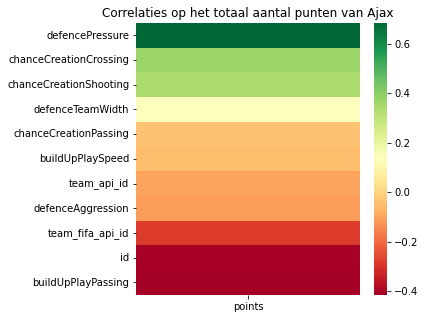

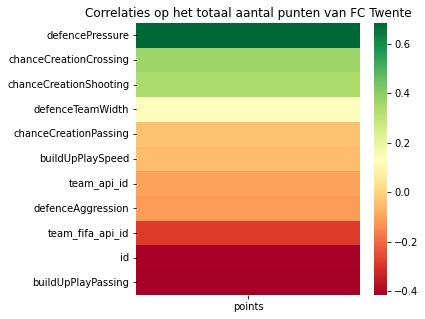

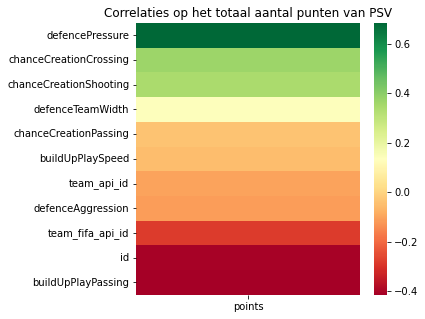

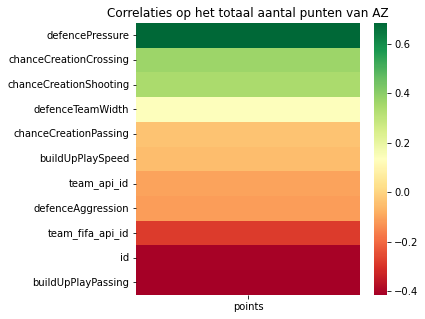

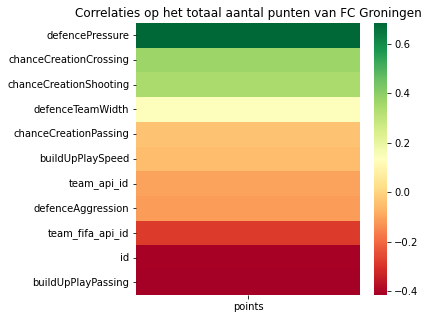

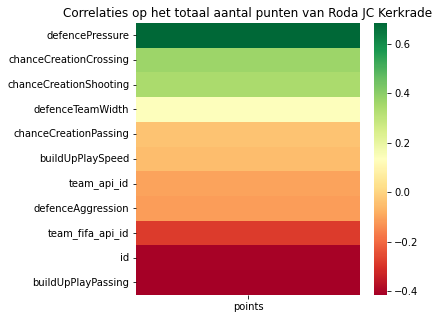

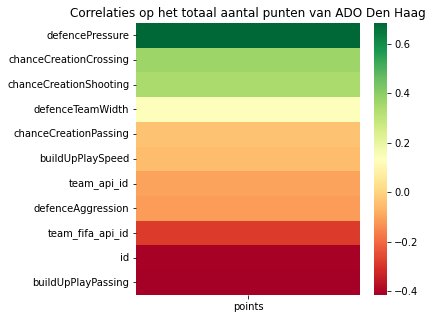

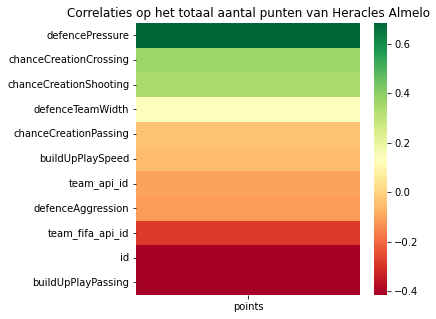

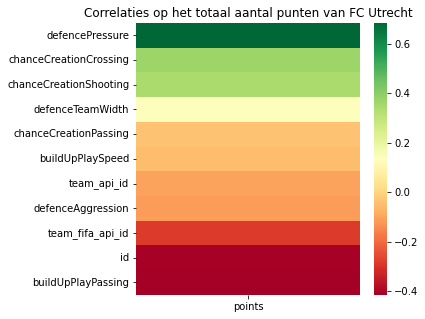

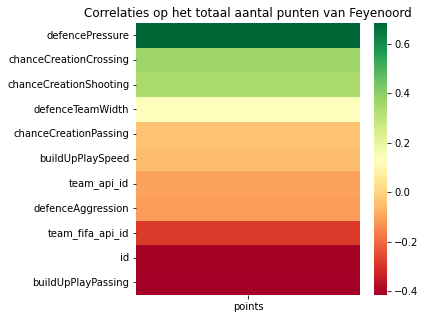

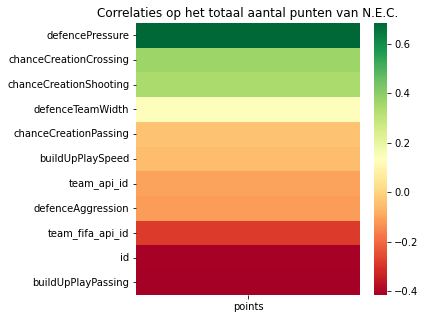

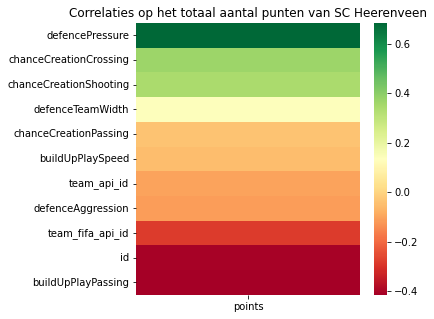

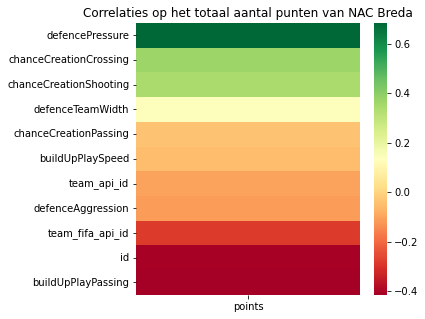

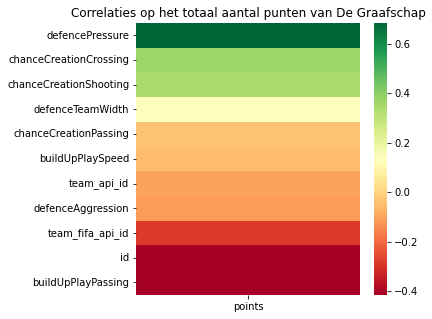

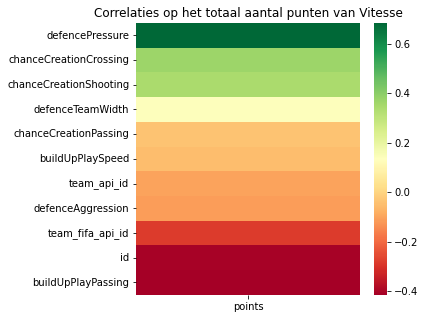

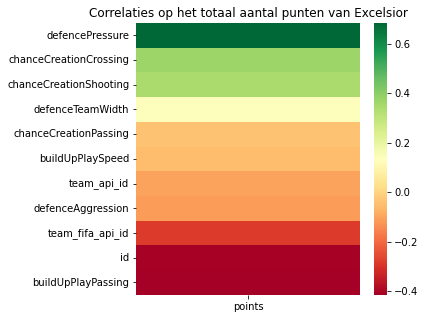

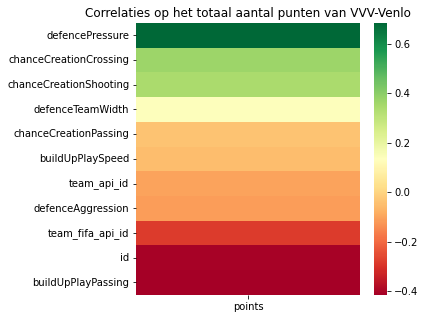

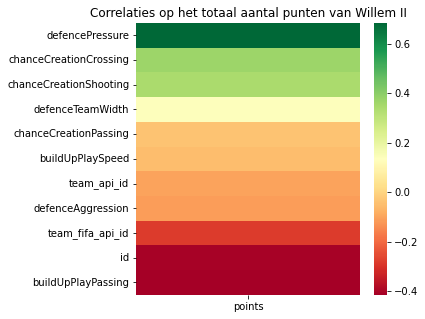

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for team in total_df['team_name'].unique():

    df_corr = total_df.corr() 
    points_corr = df_corr["points"] 
    df_points_corr = pd.DataFrame(points_corr, columns=['points']) 
    df_heatmap = df_points_corr.drop(index='points')

    pd.set_option("expand_frame_repr", False)
    df_heatmap.dropna(inplace=True)
    plt.figure(figsize=(5,5))

    s = sns.heatmap(df_heatmap.sort_values(by=['points'], ascending=False), cmap='RdYlGn') 
    plt.title(f"Correlaties op het totaal aantal punten van {team}") 
    plt.show() 

### Visueel maken bevindingen.   <a name="visualisatie"></a>

Om een beter inzicht te krijgen in hoe de sterkste en zwakste variabelen zich verhouden worden hieronder twee scatterplots aan gemaakt, hier kunnen wij zien dat de variabele "defencePressure" zich positief verhoudt ten opzichte van het behaalde aantal punten en "buildupPlayPassing" zich negatief verhoudt.

<function matplotlib.pyplot.show(close=None, block=None)>

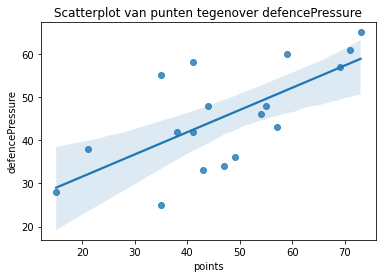

In [15]:
sns.regplot(data=total_df, x="points", y="defencePressure")
plt.title("Scatterplot van punten tegenover defencePressure") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

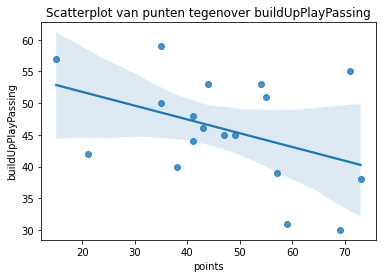

In [16]:
sns.regplot(data=total_df, x="points", y="buildUpPlayPassing")
plt.title("Scatterplot van punten tegenover buildUpPlayPassing") 
plt.show

[Terug naar het begin](#jump)

# Sprint 4    <a name="sprint4"></a>

## 1. Numerieke gemiddelde spelers. <a name="gemiddeldspeler"></a>
Maak op basis van het dataframe met de spelersattributen een nieuw dataframe waarin voor iedere speler slechts één rij is met daarin het gemiddelde van alle numerieke ratings.

to do: merge tussen deze 2 en dan group by op player name/player id

In [17]:
df_p_pa = df_player.merge(df_player_attributes, on=['player_api_id', 'player_fifa_api_id'])
df_p_pa_avg = df_p_pa.groupby('player_name').mean()
display(df_p_pa_avg)

,id_x,player_api_id,player_fifa_api_id,height,weight,id_y,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,1.0,505942.0,218353.0,182.88,187.0,3.0,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,50.600000,44.600000,38.600000,63.600000,48.600000,60.000000,64.000000,59.000000,46.600000,65.000000,54.600000,58.000000,54.000000,76.000000,34.600000,65.800000,52.200000,44.600000,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
Aaron Cresswell,2.0,155782.0,189615.0,170.18,146.0,22.0,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,61.090909,61.878788,62.121212,63.242424,61.787879,76.000000,74.939394,75.242424,67.848485,84.727273,65.909091,75.303030,72.878788,51.757576,54.121212,65.060606,57.878788,51.484848,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
Aaron Doran,3.0,162549.0,186170.0,170.18,163.0,51.5,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,69.038462,60.192308,55.615385,60.461538,68.615385,75.538462,77.500000,77.615385,50.346154,80.730769,62.807692,67.307692,70.923077,70.076923,58.038462,59.115385,47.269231,61.807692,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
Aaron Galindo,4.0,30572.0,140161.0,182.88,198.0,76.0,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,55.565217,37.782609,40.391304,60.826087,63.173913,50.217391,52.826087,62.826087,58.217391,44.086957,64.869565,70.782609,55.434783,78.695652,31.304348,69.304348,61.565217,35.913043,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
Aaron Hughes,5.0,23780.0,17725.0,182.88,154.0,100.0,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,50.600000,45.480000,26.360000,56.840000,60.160000,51.120000,54.080000,50.760000,69.400000,64.160000,47.080000,77.840000,66.480000,73.800000,24.280000,69.680000,76.840000,40.080000,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zsolt Low,11073.0,36491.0,111191.0,180.34,154.0,183957.0,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,66.857143,60.000000,52.571429,58.285714,68.142857,71.000000,72.142857,59.000000,69.142857,72.000000,60.714286,42.000000,70.000000,66.571429,56.714286,71.000000,68.285714,61.571429,66.000000,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286
Zurab Khizanishvili,11074.0,35506.0,47058.0,185.42,172.0,183964.5,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,36.000000,29.000000,41.375000,50.625000,62.000000,65.000000,61.500000,56.000000,62.750000,53.000000,50.000000,68.000000,70.500000,68.000000,46.000000,71.000000,72.250000,56.500000,63.000000,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000
Zvjezdan Misimovic,11075.0,39902.0,102359.0,180.34,176.0,183973.5,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,83.000000,86.000000,74.200000,79.000000,85.200000,62.500000,65.700000,78.200000,75.600000,72.100000,75.800000,58.000000,63.000000,64.100000,79.000000,57.500000,49.200000,76.200000,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000


## 2. Toevoegen overall rating in dataframe match. <a name="overallrating"></a>
Voeg voor iedere regel in het dataframe match de overall rating toe van iedere speler. Hint: gebruik hierbij list comprehensions en een zelf-gedefinieerde functie.

to do: laatste 30 kollommen weg halen, xy weg, drop rows missende waardes spelers, mergen met df_player_player-attributes

In [18]:
df_p_rating = df_p_pa_avg.iloc[:, [2, 6]]
display(df_p_rating)

,player_fifa_api_id,overall_rating
player_name,,
Aaron Appindangoye,218353.0,63.600000
Aaron Cresswell,189615.0,66.969697
Aaron Doran,186170.0,67.000000
Aaron Galindo,140161.0,69.086957
Aaron Hughes,17725.0,73.240000
...,...,...
Zsolt Low,111191.0,67.571429
Zurab Khizanishvili,47058.0,70.750000
Zvjezdan Misimovic,102359.0,80.000000


In [19]:
#x, y en laatste 38 kolommen deleten & delete null values
df_match_fixed = df_match.iloc[:, np.r_[0:11, 55:77]].dropna()
display(df_match_fixed)

df_tester = df_match_fixed.merge(df_p_pa_avg[['player_fifa_api_id', 'overall_rating']], how='left', left_on='home_player_1', right_on='player_fifa_api_id')
df_tester.rename(columns = {'overall_rating':'overall_rating_home_1'}, inplace=True)
display(df_tester)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,3,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,1,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,26502.0,34480.0,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,0,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,130027.0,38318.0,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,25973,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992089,10243,10191,3,3,274776.0,451982.0,34268.0,197757.0,121080.0,462608.0,67008.0,632356.0,198082.0,194532.0,42262.0,67311.0,8800.0,320183.0,67304.0,67389.0,133126.0,186524.0,93223.0,121115.0,25809.0,289732.0
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,player_fifa_api_id,overall_rating_home_1
0,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,NaN,NaN
1,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,3,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,NaN,NaN
2,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0,NaN,NaN
3,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,1,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,26502.0,34480.0,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0,NaN,NaN
4,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,0,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,130027.0,38318.0,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21369,25973,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992089,10243,10191,3,3,274776.0,451982.0,34268.0,197757.0,121080.0,462608.0,67008.0,632356.0,198082.0,194532.0,42262.0,67311.0,8800.0,320183.0,67304.0,67389.0,133126.0,186524.0,93223.0,121115.0,25809.0,289732.0,NaN,NaN
21370,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,NaN,NaN
21371,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,NaN,NaN
21372,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,NaN,NaN


## 3. Visualisatie overall rating speler van een seizoen.  <a name="visueeloverallseizoen"></a>
Maak voor één seizoen een visualisatie waarin je de gemiddelde overall rating van alle spelers over alle wedstrijden per team laat zien.

## 4. Visualisatie punten per wedstrijd per team. <a name="visueelpuntenwedstrijd"></a>
Maak voor hetzelfde seizoen een visualisatie waarin je het gemiddelde aantal punten per wedstrijd van ieder team laat zien.

In [20]:
df_copy_match = df_match
df_copy_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [21]:
# wilde even koekeloeren wat de kolom namen waren 
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [30]:
# per gespeelde wedstrijd van seizoen 2010/2011 het aantal punten tonen
punten_home_team = pd.read_sql("""
        SELECT t.team_long_name as team_name, 
            m.home_team_api_id AS home_id, 
            m.date as date,

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                        ELSE 0 END) AS home_points            
            
            FROM Match AS m 
        
                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 
        
                GROUP BY m.home_team_api_id, m.away_team_api_id;

""", con)

punten_home_team

,team_name,home_id,date,home_points
0,SC Heerenveen,10228,2010-09-11 00:00:00,3
1,SC Heerenveen,10228,2011-02-05 00:00:00,1
2,SC Heerenveen,10228,2010-11-21 00:00:00,3
3,SC Heerenveen,10228,2010-12-18 00:00:00,3
4,SC Heerenveen,10228,2011-05-01 00:00:00,0
5,SC Heerenveen,10228,2010-12-12 00:00:00,3
6,SC Heerenveen,10228,2010-08-07 00:00:00,0
7,SC Heerenveen,10228,2011-01-30 00:00:00,0
8,SC Heerenveen,10228,2010-08-21 00:00:00,3
9,SC Heerenveen,10228,2010-11-06 00:00:00,3


In [33]:
def calculate_points_home(team_name, season, con):
    query = f"""
        SELECT t.team_long_name as team_name, 
            m.home_team_api_id AS home_id, 
            m.away_team_api_id AS away_id,
            m.date as date,

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                        ELSE 0 END) AS points            
            
            FROM Match AS m 
        
                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id OR t.team_api_id = m.away_team_api_id
                        WHERE m.season = '{season}' AND team_name = '{team_name}' 
        
                GROUP BY home_id, away_id
    """
    
    df = pd.read_sql(query, con=con)
    total_points = df['points'].sum()
    
    season_row = {'team_name': team_name, 'home_id': None, 'away_id': None, 'date': None, 'points': total_points}
    df = df.append(season_row, ignore_index=True)
    df.loc[df['date'].isnull(), 'date'] = f'Seizoen {season}'
    
    return df


In [34]:
#het totaal bij elkaar optellen van alle punten van seizoen 2010/2011 
team_name = 'SC Heerenveen'
season = '2010/2011'

punten_home_team = calculate_points_home(team_name, season, con)
print(punten_home_team)

        team_name home_id away_id                 date  points
0   SC Heerenveen    8277   10228  2011-03-12 00:00:00       1
1   SC Heerenveen    8464   10228  2010-08-28 00:00:00       1
2   SC Heerenveen    8525   10228  2011-02-26 00:00:00       3
3   SC Heerenveen    8526   10228  2010-09-17 00:00:00       3
4   SC Heerenveen    8593   10228  2010-10-27 00:00:00       3
5   SC Heerenveen    8611   10228  2010-08-14 00:00:00       1
6   SC Heerenveen    8640   10228  2011-04-10 00:00:00       1
7   SC Heerenveen    8674   10228  2010-10-17 00:00:00       3
8   SC Heerenveen    9761   10228  2011-02-13 00:00:00       0
9   SC Heerenveen    9791   10228  2011-03-19 00:00:00       3
10  SC Heerenveen    9803   10228  2011-05-15 00:00:00       1
11  SC Heerenveen    9839   10228  2011-04-23 00:00:00       1
12  SC Heerenveen    9908   10228  2010-12-05 00:00:00       3
13  SC Heerenveen   10217   10228  2011-01-21 00:00:00       3
14  SC Heerenveen   10218   10228  2010-10-30 00:00:00 

In [32]:
# Punten (allen voor gekozen voetbalteam) wat ze hebben gescoord tijden away wedstrijden 
punten_away_team = pd.read_sql("""
        SELECT t.team_long_name AS team_name, 
            m.away_team_api_id AS away_id, 
            m.date AS date,

            SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS away_points            

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 

                GROUP BY m.home_team_api_id, m.away_team_api_id;

""", con)

punten_away_team


,team_name,away_id,date,away_points
0,SC Heerenveen,10228,2011-03-12 00:00:00,1
1,SC Heerenveen,10228,2010-08-28 00:00:00,1
2,SC Heerenveen,10228,2011-02-26 00:00:00,0
3,SC Heerenveen,10228,2010-09-17 00:00:00,0
4,SC Heerenveen,10228,2010-10-27 00:00:00,0
5,SC Heerenveen,10228,2010-08-14 00:00:00,1
6,SC Heerenveen,10228,2011-04-10 00:00:00,1
7,SC Heerenveen,10228,2010-10-17 00:00:00,0
8,SC Heerenveen,10228,2011-02-13 00:00:00,3
9,SC Heerenveen,10228,2011-03-19 00:00:00,0


In [45]:
# het totaal aantal punten van alle teams
# voor seizoen 2010/2011 
# zowel als home en away wedstrijden 
total_points2 = pd.read_sql("""
        SELECT team_name, SUM(points) as total_points
        FROM (
            SELECT t.team_long_name as team_name, 
                m.home_team_api_id AS home_id, 

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '2010/2011' AND team_name = 'SC Heerenveen' 

                GROUP BY m.home_team_api_id, m.away_team_api_id

            UNION ALL

            SELECT t.team_long_name as team_name, 
                m.away_team_api_id AS away_id, 

                SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                    WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '2010/2011'

                GROUP BY m.home_team_api_id, m.away_team_api_id
        ) AS subquery

        GROUP BY team_name
        ORDER BY total_points DESC;
""", con)

total_points2

# ook gesorteerd van hoog naar laag
# sc heerenveen is lowkey wel goed

,team_name,total_points
0,Rangers,49
1,FC Barcelona,46
2,Celtic,44
3,Real Madrid CF,43
4,SC Heerenveen,41
5,FC Porto,41
6,Milan,39
7,Valencia CF,36
8,Bayer 04 Leverkusen,36
9,Borussia Dortmund,35


In [65]:
# in een functie gezet zodat ik er een visualisatie van kon maken 
def total_points_by_team(season, team_name):
    con = sqlite3.connect('database.sqlite')
    query = f"""
        SELECT team_name, SUM(points) as total_points
        FROM (
            SELECT t.team_long_name as team_name, 
                m.home_team_api_id AS home_id, 

                SUM(CASE WHEN m.home_team_goal > m.away_team_goal THEN 3
                    WHEN m.home_team_goal = m.away_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.home_team_api_id
                        WHERE m.season = '{season}' AND team_name = '{team_name}' 

                GROUP BY m.home_team_api_id, m.away_team_api_id

            UNION ALL

            SELECT t.team_long_name as team_name, 
                m.away_team_api_id AS away_id, 

                SUM(CASE WHEN m.away_team_goal > m.home_team_goal THEN 3
                    WHEN m.away_team_goal = m.home_team_goal THEN 1
                    ELSE 0 END) AS points

            FROM Match AS m 

                INNER JOIN team AS t 
                    ON t.team_api_id = m.away_team_api_id
                        WHERE m.season = '{season}'

                GROUP BY m.home_team_api_id, m.away_team_api_id
        ) AS subquery

        GROUP BY team_name
        ORDER BY total_points DESC;
    """
    total_points = pd.read_sql(query, con)
    con.close()
    return total_points


In [66]:
# even koekeloeren 
total_points = total_points_by_team('2010/2011', 'SC Heerenveen')
print(total_points)

                        team_name  total_points
0                         Rangers            49
1                    FC Barcelona            46
2                          Celtic            44
3                  Real Madrid CF            43
4                   SC Heerenveen            41
5                        FC Porto            41
6                           Milan            39
7                     Valencia CF            36
8             Bayer 04 Leverkusen            36
9               Borussia Dortmund            35
10                      FC Zürich            33
11                     LOSC Lille            32
12                           Ajax            32
13                1. FSV Mainz 05            32
14         Olympique de Marseille            31
15            Heart of Midlothian            31
16                      FC Twente            31
17                       FC Basel            31
18                        Arsenal            31
19                            PSV       

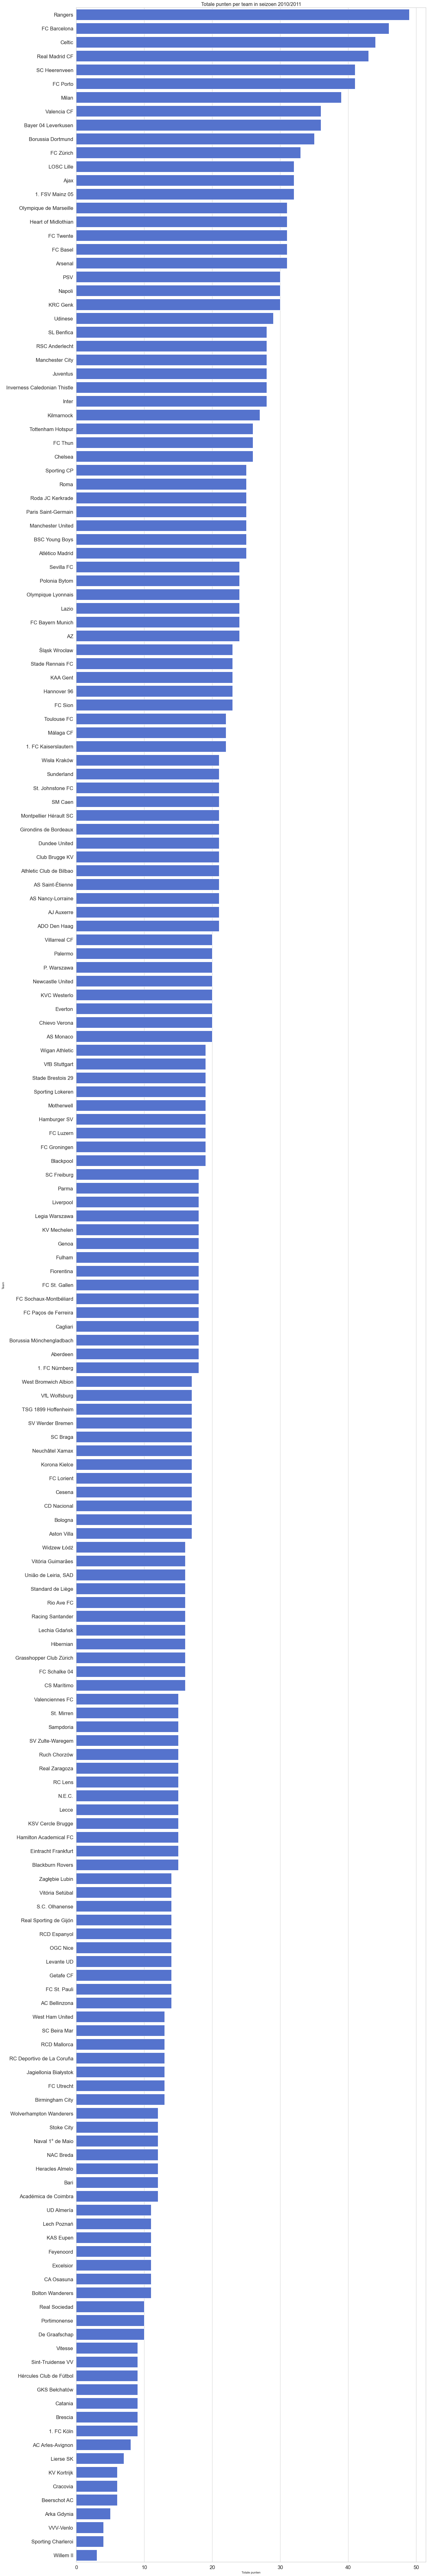

In [82]:
# de visualisatie van alle teams, voor seizoen 2010/2011 
total_points = total_points_by_team('2010/2011', 'SC Heerenveen')

sns.set_style('whitegrid')
plt.figure(figsize=(20, 150))
sns.barplot(data=total_points, y='team_name', x='total_points', color='royalblue')
plt.title('Totale punten per team in seizoen 2010/2011', fontsize=16)
plt.xlabel('Totale punten', fontsize=10)
plt.ylabel('Team', fontsize=10)
plt.show()

## 5. Visualisatie vergelijking overall rating & punten per team. <a name="overallratingpuntenteam"></a>
Toon een visualisatie waarin je de gemiddelde overall ratings per team vergelijkt met het gemiddelde aantal punten per team.

## 6. Toepassen functie op andere rating. <a name="definitieandererating"></a>
Herhaal stappen 3 tot en met 5 voor een andere ‘rating’. Hint: het gebruik van functies maakt het herhalen van handelingen veel eenvoudiger.

[Terug naar het begin](#jump)